In [1]:
import numpy as np
import pandas as pd
import lux
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import new_wrangle

In [2]:
plt.style.use("ggplot")

In [3]:
df = new_wrangle.acquire_data()

In [4]:
df = new_wrangle.wrangle_walmart()

/Users/albertopuentes/Desktop/codeup-data-science/capstone/new_wrangle.py:65: FutureWarning:weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)


In [5]:
df.head()

,store_id,weekly_sales,holiday_flag,temperature,fuel_price,CPI,unemployment,store_type,store_size,month,...,quarter,weekday,week_of_year,deflated_series,sales_delta_weekly,sales_delta_yearly,gas_delta_weekly,gas_delta_yearly,season,holiday_name
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1643690.90,0,42,2.57,211.096,8.106,A,151315,February,...,1,Friday,5,7786.46,0.0,0.0,0.0,0.0,Winter,no_holiday
2010-02-05,10,2193048.75,0,54,2.96,126.442,9.765,B,126512,February,...,1,Friday,5,17344.31,0.0,0.0,0.0,0.0,Winter,no_holiday
2010-02-05,37,536006.73,0,45,2.57,209.853,8.554,C,39910,February,...,1,Friday,5,2554.20,0.0,0.0,0.0,0.0,Winter,no_holiday
2010-02-05,17,789036.02,0,23,2.67,126.442,6.548,B,93188,February,...,1,Friday,5,6240.30,0.0,0.0,0.0,0.0,Winter,no_holiday
2010-02-05,30,465108.52,0,39,2.57,210.753,8.324,C,42988,February,...,1,Friday,5,2206.89,0.0,0.0,0.0,0.0,Winter,no_holiday


In [6]:
df[df.store_id ==3]

,store_id,weekly_sales,holiday_flag,temperature,fuel_price,CPI,unemployment,store_type,store_size,month,...,quarter,weekday,week_of_year,deflated_series,sales_delta_weekly,sales_delta_yearly,gas_delta_weekly,gas_delta_yearly,season,holiday_name
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,3,461622.22,0,45,2.57,214.425,7.368,C,37392,February,...,1,Friday,5,2152.84,0.00,0.00,0.00,0.00,Winter,no_holiday
2010-02-12,3,420728.96,1,47,2.55,214.575,7.368,C,37392,February,...,1,Friday,6,1960.75,-40893.26,0.00,-0.02,0.00,Winter,super_bowl
2010-02-19,3,421642.19,0,47,2.51,214.620,7.368,C,37392,February,...,1,Friday,7,1964.60,913.23,0.00,-0.04,0.00,Winter,no_holiday
2010-02-26,3,407204.86,0,52,2.56,214.648,7.368,C,37392,February,...,1,Friday,8,1897.08,-14437.33,0.00,0.05,0.00,Winter,no_holiday
2010-03-05,3,415202.04,0,53,2.62,214.675,7.368,C,37392,March,...,1,Friday,9,1934.10,7997.18,0.00,0.06,0.00,Spring,no_holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,3,389813.02,0,77,3.67,226.518,6.334,C,37392,September,...,3,Friday,39,1720.89,-24579.07,21335.09,-0.05,0.31,Summer,no_holiday
2012-10-05,3,443557.65,0,72,3.62,226.721,6.034,C,37392,October,...,4,Friday,40,1956.40,53744.63,40215.25,-0.05,0.34,Fall,no_holiday
2012-10-12,3,410804.39,0,70,3.60,226.924,6.034,C,37392,October,...,4,Friday,41,1810.32,-32753.26,42521.82,-0.02,0.33,Fall,no_holiday


In [7]:
#train test split
X_train, y_train, X_test, y_test = new_wrangle.train_test(df,'weekly_sales')

X_train -> (5445, 20)
X_test -> (990, 20)


In [8]:
X_train.head()

,store_id,holiday_flag,temperature,fuel_price,CPI,unemployment,store_type,store_size,month,year,quarter,weekday,week_of_year,deflated_series,sales_delta_weekly,sales_delta_yearly,gas_delta_weekly,gas_delta_yearly,season,holiday_name
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,0,42,2.57,211.096,8.106,A,151315,February,2010,1,Friday,5,7786.46,0.0,0.0,0.0,0.0,Winter,no_holiday
2010-02-05,10,0,54,2.96,126.442,9.765,B,126512,February,2010,1,Friday,5,17344.31,0.0,0.0,0.0,0.0,Winter,no_holiday
2010-02-05,37,0,45,2.57,209.853,8.554,C,39910,February,2010,1,Friday,5,2554.20,0.0,0.0,0.0,0.0,Winter,no_holiday
2010-02-05,17,0,23,2.67,126.442,6.548,B,93188,February,2010,1,Friday,5,6240.30,0.0,0.0,0.0,0.0,Winter,no_holiday
2010-02-05,30,0,39,2.57,210.753,8.324,C,42988,February,2010,1,Friday,5,2206.89,0.0,0.0,0.0,0.0,Winter,no_holiday


### Visualizing Target Versus Features

Text(0.5, 1.0, 'Average Temperature by Month')

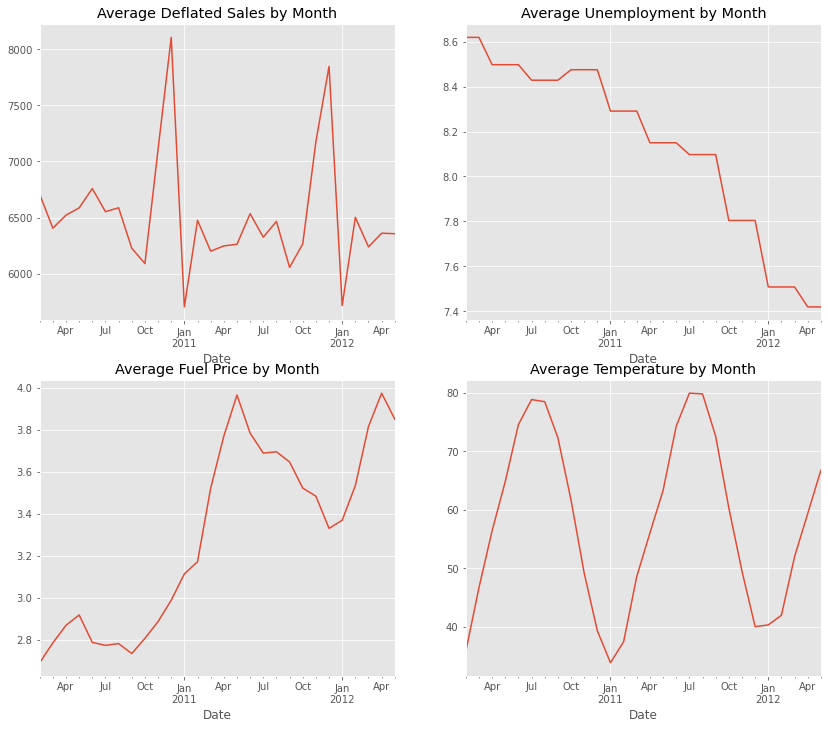

In [9]:
plt.figure(figsize=(14, 12)) # (width, height)

plt.subplot(2, 2, 1)
X_train.deflated_series.resample('M').mean().plot()
plt.xticks(rotation=0)
plt.title('Average Deflated Sales by Month')

plt.subplot(2, 2, 2)
X_train.unemployment.resample('M').mean().plot()
plt.xticks(rotation=0)
plt.title('Average Unemployment by Month')

plt.subplot(2, 2, 3)
X_train.fuel_price.resample('M').mean().plot()
plt.xticks(rotation=0)
plt.title('Average Fuel Price by Month')

plt.subplot(2, 2, 4)
X_train.temperature.resample('M').mean().plot()
plt.xticks(rotation=0)
plt.title('Average Temperature by Month')

### Visualizing Target and Feature Delta

Text(0.5, 1.0, 'Average Monthly YoY change - Temperature ')

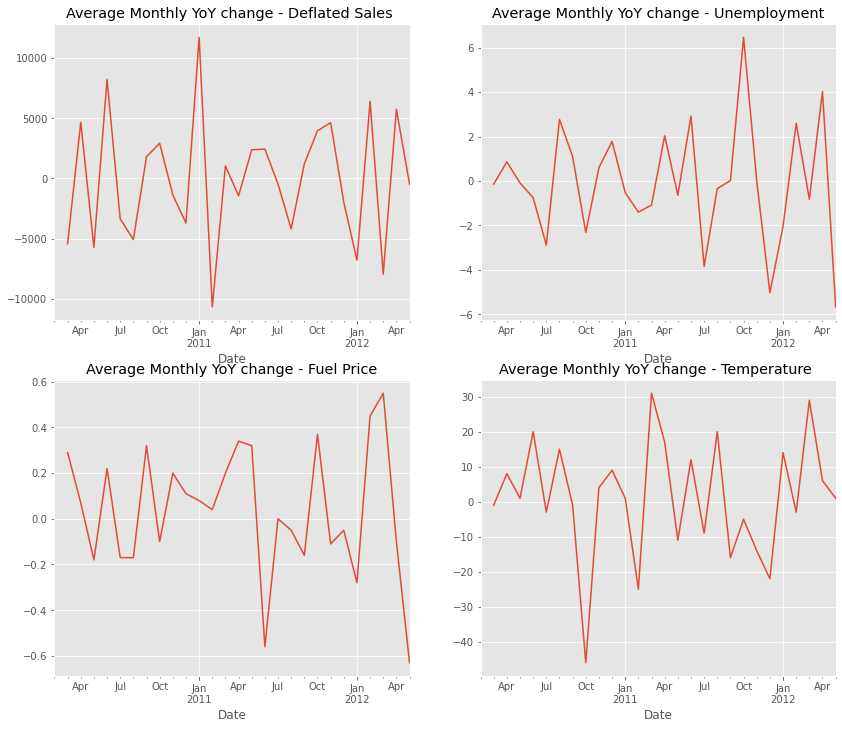

In [10]:
# Year over year changes
plt.figure(figsize=(14, 12)) # (width, height)

plt.subplot(2, 2, 1)
X_train.deflated_series.resample('M').last().diff().plot()
plt.xticks(rotation=0)
plt.title('Average Monthly YoY change - Deflated Sales ')

plt.subplot(2, 2, 2)
X_train.unemployment.resample('M').last().diff().plot()
plt.xticks(rotation=0)
plt.title('Average Monthly YoY change - Unemployment')

plt.subplot(2, 2, 3)
X_train.fuel_price.resample('M').last().diff().plot()
plt.xticks(rotation=0)
plt.title('Average Monthly YoY change - Fuel Price')

plt.subplot(2, 2, 4)
X_train.temperature.resample('M').last().diff().plot()
plt.xticks(rotation=0)
plt.title('Average Monthly YoY change - Temperature ')

Text(0.5, 1.0, 'Average Monthly MoM change - Temperature ')

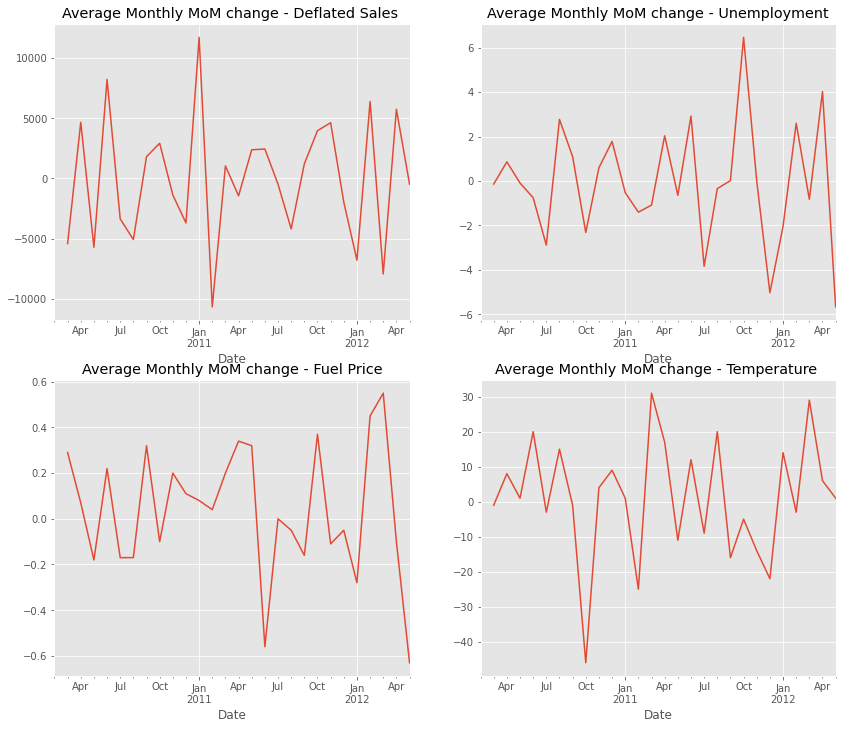

In [11]:
# Month over month changes
plt.figure(figsize=(14, 12)) # (width, height)

plt.subplot(2, 2, 1)
X_train.deflated_series.resample('M').last().diff().plot()
plt.xticks(rotation=0)
plt.title('Average Monthly MoM change - Deflated Sales ')

plt.subplot(2, 2, 2)
X_train.unemployment.resample('M').last().diff().plot()
plt.xticks(rotation=0)
plt.title('Average Monthly MoM change - Unemployment')

plt.subplot(2, 2, 3)
X_train.fuel_price.resample('M').last().diff().plot()
plt.xticks(rotation=0)
plt.title('Average Monthly MoM change - Fuel Price')

plt.subplot(2, 2, 4)
X_train.temperature.resample('M').last().diff().plot()
plt.xticks(rotation=0)
plt.title('Average Monthly MoM change - Temperature ')

In [12]:
### Visualizing Target Lags

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/opt/homebrew/anaconda3/lib/python3.8/site-packag

Text(0.5, 1.0, 'Lag plot with lag=52')

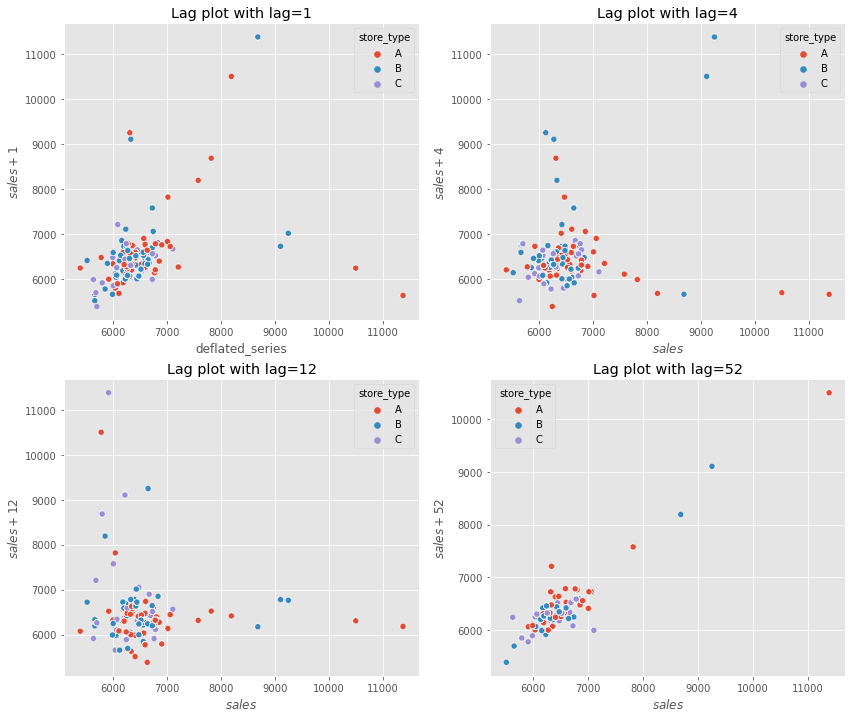

In [13]:
# Various Target Lag plots

plt.figure(figsize=(14, 12)) # (width, height)

plt.subplot(2, 2, 1)
sns.scatterplot(X_train.groupby('Date').deflated_series.agg('mean'), X_train.groupby('Date').deflated_series.agg('mean').shift(-1), hue=X_train.store_type)
plt.ylabel('$sales + 1$')
plt.title('Lag plot with lag=1')

plt.subplot(2, 2, 2)
sns.scatterplot(X_train.groupby('Date').deflated_series.agg('mean'), X_train.groupby('Date').deflated_series.agg('mean').shift(-4), hue=X_train.store_type)
plt.xlabel('$sales$')
plt.ylabel('$sales + 4$')
plt.title('Lag plot with lag=4')

plt.subplot(2, 2, 3)
sns.scatterplot(X_train.groupby('Date').deflated_series.agg('mean'), X_train.groupby('Date').deflated_series.agg('mean').shift(-12), hue=X_train.store_type)
plt.xlabel('$sales$')
plt.ylabel('$sales + 12$')
plt.title('Lag plot with lag=12')

plt.subplot(2, 2, 4)
sns.scatterplot(X_train.groupby('Date').deflated_series.agg('mean'), X_train.groupby('Date').deflated_series.agg('mean').shift(-52), hue=X_train.store_type)
plt.xlabel('$sales$')
plt.ylabel('$sales + 52$')
plt.title('Lag plot with lag=52')

In [14]:
a = X_train[X_train.store_type == 'A']
b = X_train[X_train.store_type == 'B']
c = X_train[X_train.store_type == 'C']

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/opt/homebrew/anaconda3/lib/python3.8/site-packag

Text(0.5, 1.0, 'Lag plot with lag=52')

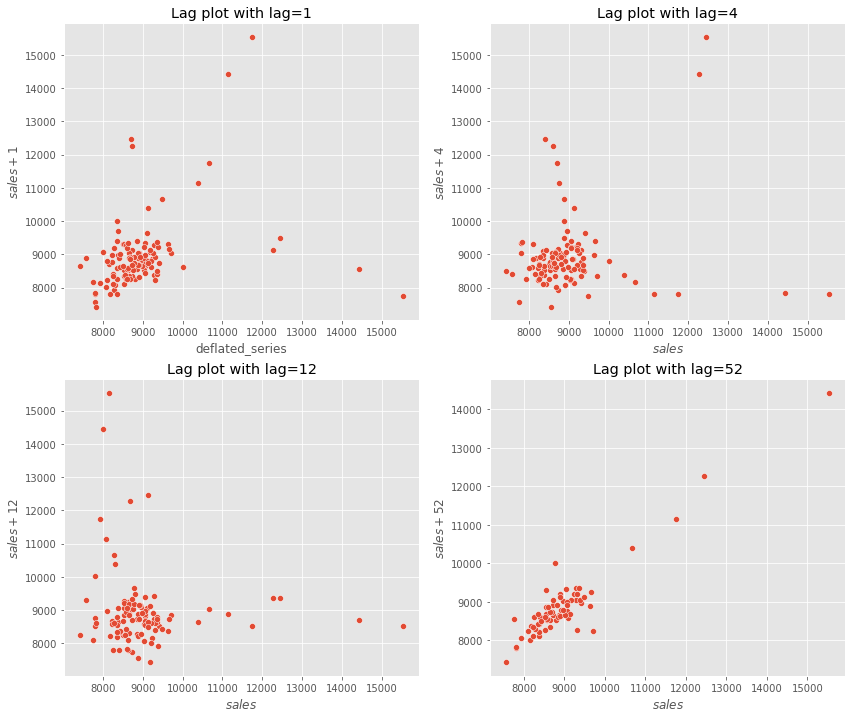

In [15]:
# Various Target Lag plots


plt.figure(figsize=(14, 12)) # (width, height)

plt.subplot(2, 2, 1)
sns.scatterplot(a.groupby('Date').deflated_series.agg('mean'), a.groupby('Date').deflated_series.agg('mean').shift(-1))
plt.ylabel('$sales + 1$')
plt.title('Lag plot with lag=1')

plt.subplot(2, 2, 2)
sns.scatterplot(a.groupby('Date').deflated_series.agg('mean'), a.groupby('Date').deflated_series.agg('mean').shift(-4))
plt.xlabel('$sales$')
plt.ylabel('$sales + 4$')
plt.title('Lag plot with lag=4')

plt.subplot(2, 2, 3)
sns.scatterplot(a.groupby('Date').deflated_series.agg('mean'), a.groupby('Date').deflated_series.agg('mean').shift(-12))
plt.xlabel('$sales$')
plt.ylabel('$sales + 12$')
plt.title('Lag plot with lag=12')

plt.subplot(2, 2, 4)
sns.scatterplot(a.groupby('Date').deflated_series.agg('mean'), a.groupby('Date').deflated_series.agg('mean').shift(-52))
plt.xlabel('$sales$')
plt.ylabel('$sales + 52$')
plt.title('Lag plot with lag=52')

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/opt/homebrew/anaconda3/lib/python3.8/site-packag

Text(0.5, 1.0, 'Lag plot with lag=52')

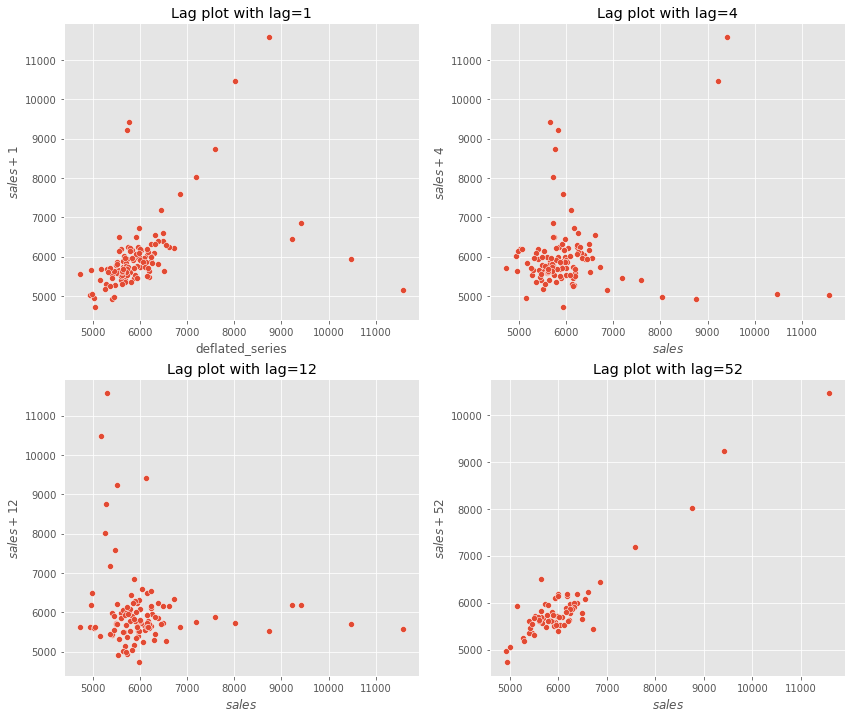

In [16]:
# Various Target Lag plots

plt.figure(figsize=(14, 12)) # (width, height)

plt.subplot(2, 2, 1)
sns.scatterplot(b.groupby('Date').deflated_series.agg('mean'), b.groupby('Date').deflated_series.agg('mean').shift(-1))
plt.ylabel('$sales + 1$')
plt.title('Lag plot with lag=1')

plt.subplot(2, 2, 2)
sns.scatterplot(b.groupby('Date').deflated_series.agg('mean'), b.groupby('Date').deflated_series.agg('mean').shift(-4))
plt.xlabel('$sales$')
plt.ylabel('$sales + 4$')
plt.title('Lag plot with lag=4')

plt.subplot(2, 2, 3)
sns.scatterplot(b.groupby('Date').deflated_series.agg('mean'), b.groupby('Date').deflated_series.agg('mean').shift(-12))
plt.xlabel('$sales$')
plt.ylabel('$sales + 12$')
plt.title('Lag plot with lag=12')

plt.subplot(2, 2, 4)
sns.scatterplot(b.groupby('Date').deflated_series.agg('mean'), b.groupby('Date').deflated_series.agg('mean').shift(-52))
plt.xlabel('$sales$')
plt.ylabel('$sales + 52$')
plt.title('Lag plot with lag=52')

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/opt/homebrew/anaconda3/lib/python3.8/site-packag

Text(0.5, 1.0, 'Lag plot with lag=52')

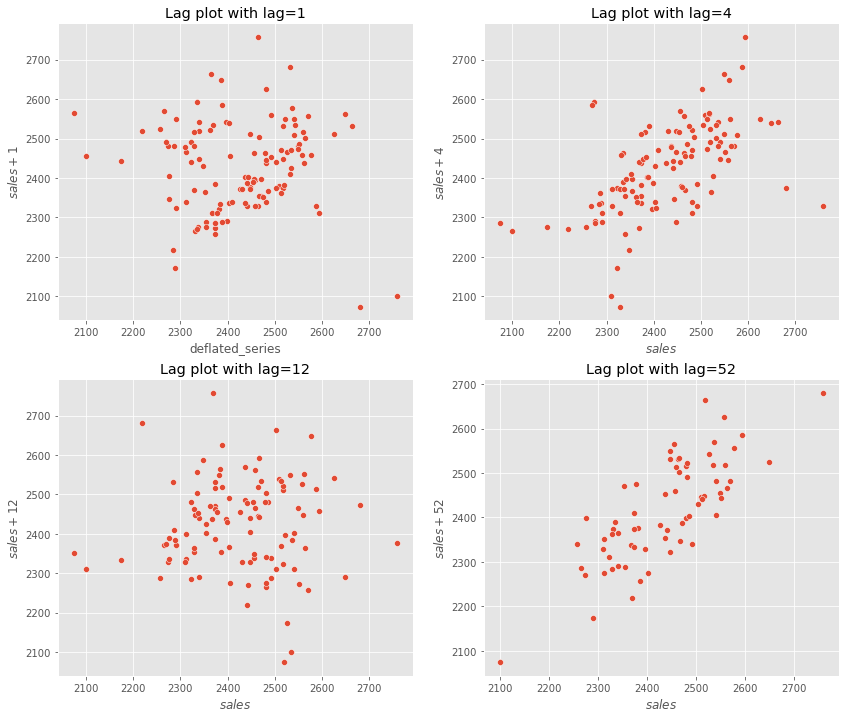

In [17]:
# Various Target Lag plots



plt.figure(figsize=(14, 12)) # (width, height)

plt.subplot(2, 2, 1)
sns.scatterplot(c.groupby('Date').deflated_series.agg('mean'), c.groupby('Date').deflated_series.agg('mean').shift(-1))
plt.ylabel('$sales + 1$')
plt.title('Lag plot with lag=1')

plt.subplot(2, 2, 2)
sns.scatterplot(c.groupby('Date').deflated_series.agg('mean'), c.groupby('Date').deflated_series.agg('mean').shift(-4))
plt.xlabel('$sales$')
plt.ylabel('$sales + 4$')
plt.title('Lag plot with lag=4')

plt.subplot(2, 2, 3)
sns.scatterplot(c.groupby('Date').deflated_series.agg('mean'), c.groupby('Date').deflated_series.agg('mean').shift(-12))
plt.xlabel('$sales$')
plt.ylabel('$sales + 12$')
plt.title('Lag plot with lag=12')

plt.subplot(2, 2, 4)
sns.scatterplot(c.groupby('Date').deflated_series.agg('mean'), c.groupby('Date').deflated_series.agg('mean').shift(-52))
plt.xlabel('$sales$')
plt.ylabel('$sales + 52$')
plt.title('Lag plot with lag=52')

ValueError: Using `title` of type `list` is not supported unless `subplots=True` is passed

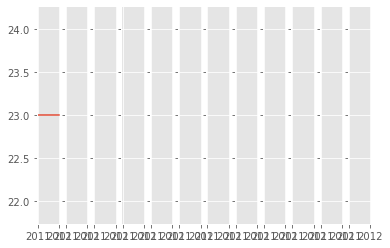

In [18]:
table = X_train.groupby([X_train.index.year, X_train.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)